# Principal Component Analysis - Dermatology Dataset UCI

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

This dataset is taken from 'http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology'. This analysis intends to identify the most important features of the dataset that contribute to making a prediction for a specific type of dermatologic disease from the given list. The below detail information can be found on 'http://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names'

1. Title: Dermatology Database

2. Source Information:
   (a) Original owners:
       -- 1. Nilsel Ilter, M.D., Ph.D., 
             Gazi University, 
             School of Medicine
             06510 Ankara, Turkey
             Phone: +90 (312) 214 1080

       -- 2. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

   (b) Donor: H. Altay Guvenir,
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date:  January, 1998

3. Past Usage:
   1. G. Demiroz, H. A. Govenir, and N. Ilter, 
      "Learning Differential Diagnosis of Eryhemato-Squamous Diseases using
       Voting Feature Intervals", Aritificial Intelligence in Medicine,

      The aim is to determine the type of Eryhemato-Squamous Disease.

4. Relevant Information:
     This database contains 34 attributes, 33 of which are linear
     valued and one of them is nominal. 

     The differential diagnosis of erythemato-squamous diseases is a real
     problem in dermatology. They all share the clinical features of
     erythema and scaling, with very little differences. The diseases in
     this group are psoriasis, seboreic dermatitis, lichen planus, 
     pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
     Usually a biopsy is necessary for the diagnosis but unfortunately
     these diseases share many histopathological features as
     well. Another difficulty for the differential diagnosis is that a
     disease may show the features of another disease at the beginning
     stage and may have the characteristic features at the following stages. 
     Patients were first evaluated clinically with 12 features.
     Afterwards, skin samples were taken for the evaluation of 22
     histopathological features. The values of the histopathological features
     are determined by an analysis of the samples under a microscope. 

     In the dataset constructed for this domain, the family history feature
     has the value 1 if any of these diseases has been observed in the
     family, and 0 otherwise. The age feature simply represents the age of
     the patient. Every other feature (clinical and histopathological) was
     given a degree in the range of 0 to 3. Here, 0 indicates that the
     feature was not present, 3 indicates the largest amount possible,
     and 1, 2 indicate the relative intermediate values.

     The names and id numbers of the patients were recently 
     removed from the database.

5. Number of Instances: 366

6. Number of Attributes: 34

7. Attribute Information:
   -- Complete attribute documentation:
      Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
      1: erythema
      2: scaling
      3: definite borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age (linear)

     Histopathological Attributes: (take values 0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
      
8. Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.

9. Class Distribution:
       Database:  Dermatology
       
       Class code:   Class:                  Number of instances:
       1             psoriasis			    112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

### Data Importing and Understanding

In [69]:
df = pd.read_csv('dermatologydata.csv', delimiter=',')

In [70]:
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [71]:
df.shape

(365, 35)

In [72]:
df.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','dlubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age (linear)', 'Classcode']

In [73]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [74]:
df['Classcode'].value_counts(ascending=False)

1    112
3     72
2     60
5     52
4     49
6     20
Name: Classcode, dtype: int64

Below is the information to understand what class code means. 
9. Class Distribution:
       Database:  Dermatology
       
       Class code:   Class:                  Number of instances:
       1             psoriasis			          112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

### Data Cleaning

Some part of the data has issues. Like the Age column. It has question marks against some values. Data cleaning is needed

In [75]:
df['Age (linear)'].unique()

array(['8', '26', '40', '45', '41', '18', '57', '22', '30', '20', '21',
       '10', '65', '38', '23', '17', '51', '42', '44', '33', '43', '50',
       '34', '?', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '55', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [76]:
df[df['Age (linear)'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [77]:
df = df.replace('?', np.nan)

In [78]:
df[df.values == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode


In [105]:
for i in df.columns:
    df[i].apply(int)

In [110]:
df.dtypes

erythema                                    int64
scaling                                     int64
definite borders                            int64
itching                                     int64
koebner phenomenon                          int64
polygonal papules                           int64
follicular papules                          int64
oral mucosal involvement                    int64
knee and elbow involvement                  int64
scalp involvement                           int64
family history(0 or 1)                      int64
melanin incontinence                        int64
eosinophils in the infiltrate               int64
PNL infiltrate                              int64
fibrosis of the papillary dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
dlubbing of the rete ridges                 int64


In [106]:
df.fillna(df.mean(),inplace=True)

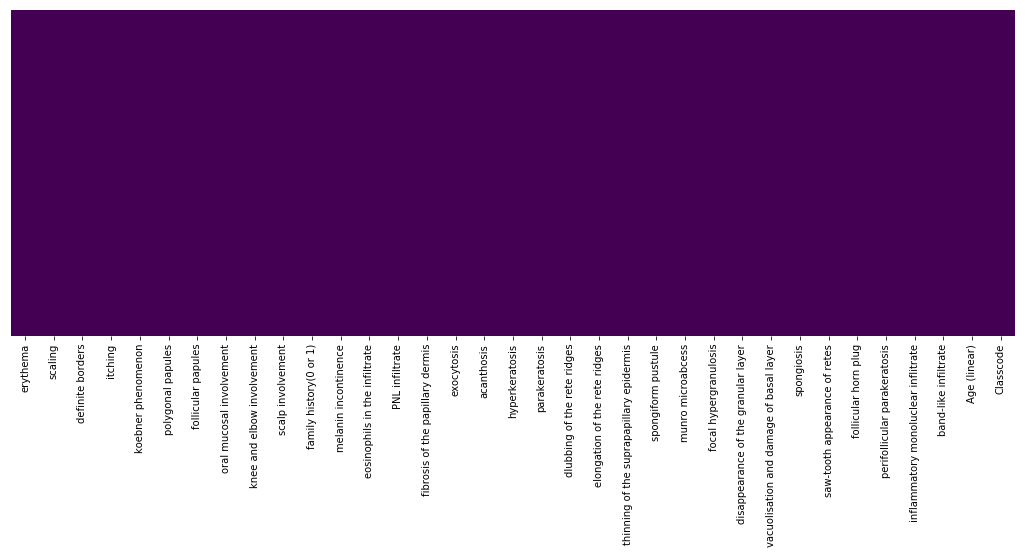

In [107]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [108]:
df[df['Age (linear)'].isnull()]

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode


In [111]:
df.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.078431,1.806723,1.574230,1.350140,0.638655,0.450980,0.170868,0.380952,0.621849,0.532213,...,0.476190,0.462185,0.943978,0.459384,0.106443,0.117647,1.879552,0.560224,36.243697,2.784314
std,0.665785,0.702451,0.898318,1.133296,0.909356,0.957513,0.577132,0.838321,0.991466,0.913198,...,0.872565,0.960950,1.125396,0.960836,0.455784,0.494517,0.698756,1.109149,15.313925,1.595633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [113]:
corr = df.corr()

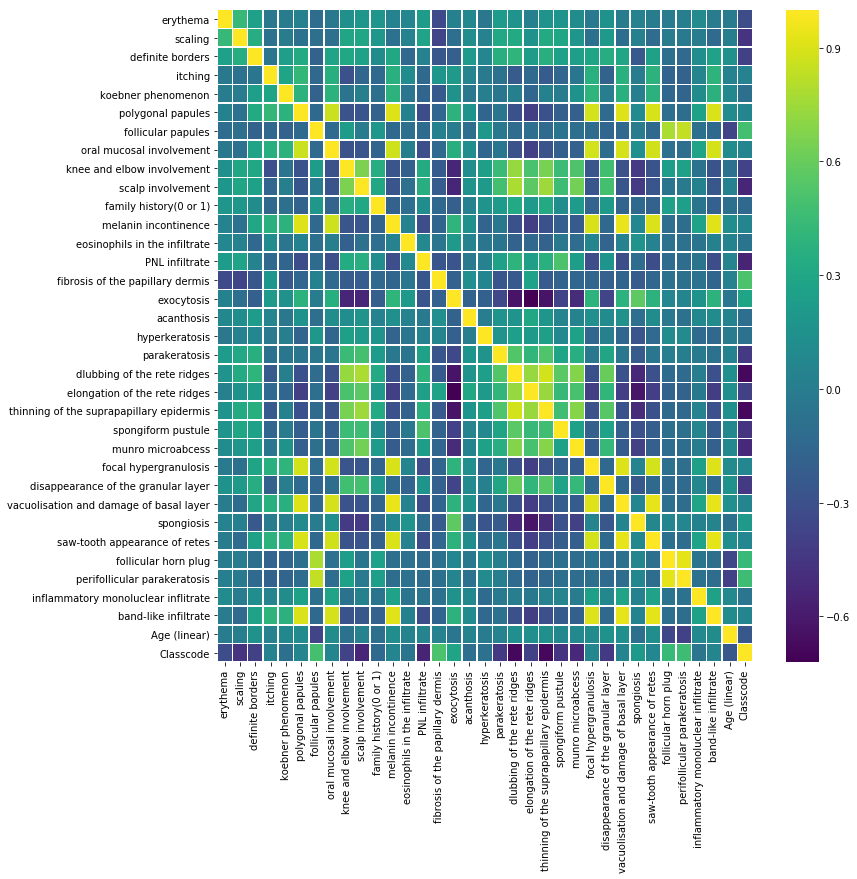

In [116]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

As we've noticed it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

### Principal Component Analysis of the dataset

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

In [122]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = df.iloc[:,0:34]  # all rows, all the features and no labels
y = df.iloc[:,-1]  # all rows, label only

In [128]:
scaled_data = scaler.fit_transform(X)

In [131]:
scaled_data

array([[ 1.38612659,  1.70111735,  1.58938378, ..., -1.26050554,
        -0.50580259, -1.84690329],
       [-0.11796822, -1.15005116,  0.47462934, ...,  0.172617  ,
         2.2027703 , -0.66985276],
       [-0.11796822,  0.27553309,  0.47462934, ...,  1.60573954,
        -0.50580259,  0.24563099],
       ...,
       [ 1.38612659,  0.27553309,  0.47462934, ...,  0.172617  ,
         2.2027703 , -0.53906936],
       [-0.11796822, -1.15005116,  1.58938378, ...,  0.172617  ,
         2.2027703 ,  0.89954796],
       [ 1.38612659,  0.27553309,  0.47462934, ...,  1.60573954,
        -0.50580259, -0.08132749]])

In [130]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA()

In [133]:
pca.fit_transform(X)

array([[-2.81795025e+01, -2.62441057e+00,  2.31790080e+00, ...,
        -1.86862886e-01,  3.55546304e-02, -2.88138380e-02],
       [-1.01705008e+01,  4.88178487e+00,  2.57669217e+00, ...,
         1.87613218e-03,  4.39528182e-01,  3.05019223e-02],
       [ 3.81090654e+00, -4.41646806e+00,  2.07206675e+00, ...,
         1.77396784e-02,  3.92556844e-02,  5.32483254e-02],
       ...,
       [-8.13554809e+00,  5.61230394e+00,  3.45202362e+00, ...,
        -2.07181654e-01,  3.47339923e-01, -5.43110491e-02],
       [ 1.38273781e+01,  4.86361793e+00,  2.17487752e+00, ...,
         1.64691189e-01,  1.90981468e-01, -3.15156335e-02],
       [-1.17999551e+00, -4.74224925e+00,  2.71185028e+00, ...,
        -5.50656297e-02,  2.37604074e-02,  7.61390714e-02]])

In [134]:
pca.get_covariance()

array([[ 4.43269443e-01,  2.00594845e-01,  1.48656092e-01, ...,
         4.31813175e-02, -1.03547037e-02, -4.72571051e-02],
       [ 2.00594845e-01,  4.93437825e-01,  2.20847890e-01, ...,
        -3.68237183e-03, -1.04900387e-01,  1.62402039e-01],
       [ 1.48656092e-01,  2.20847890e-01,  8.06974475e-01, ...,
         7.49771819e-02,  2.72904667e-01,  2.00011802e+00],
       ...,
       [ 4.31813175e-02, -3.68237183e-03,  7.49771819e-02, ...,
         4.88260473e-01,  2.02498977e-01,  9.25502785e-01],
       [-1.03547037e-02, -1.04900387e-01,  2.72904667e-01, ...,
         2.02498977e-01,  1.23021119e+00,  1.80972052e+00],
       [-4.72571051e-02,  1.62402039e-01,  2.00011802e+00, ...,
         9.25502785e-01,  1.80972052e+00,  2.34516287e+02]])

In [135]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.06495660e-01, 3.33716150e-02, 1.71354455e-02, 7.04525489e-03,
       4.37416527e-03, 3.37717324e-03, 3.09843865e-03, 2.52464509e-03,
       2.29360377e-03, 2.05761628e-03, 1.94884469e-03, 1.84131072e-03,
       1.61292997e-03, 1.46914258e-03, 1.37318955e-03, 1.12356370e-03,
       1.00038553e-03, 9.69241050e-04, 9.20187466e-04, 8.64312792e-04,
       7.74358737e-04, 6.55658402e-04, 5.65720677e-04, 4.24968171e-04,
       4.17179922e-04, 3.80940340e-04, 3.67001426e-04, 3.10228606e-04,
       2.83126439e-04, 2.65384326e-04, 2.55095615e-04, 2.02780673e-04,
       1.49665281e-04, 5.11656517e-05])

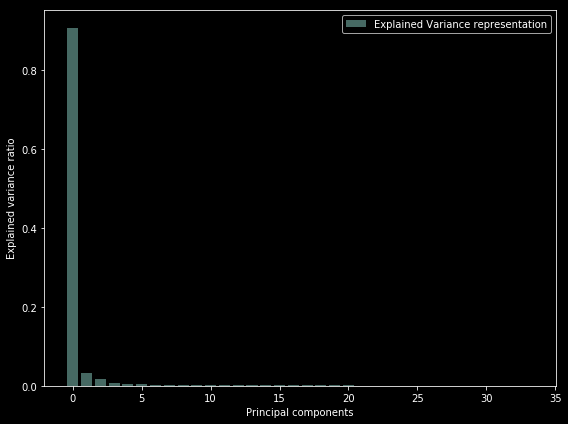

In [138]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(34), explained_variance, alpha=0.5, align='center',
            label='Explained Variance representation')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The above graph is a clear indication that first column 'erythema' has the largest explained variance ratio in the given dataset. The second column 'scaling' is the next highest but at a very distant importance level.

### Model Selection and Prediction 

#### 1) I try using RandomForestRegressor

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(249, 34)

In [223]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(249, 34)
(108, 34)
(249,)
(108,)


In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [197]:
model = RandomForestRegressor()
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
       
print(scores)

[0.866570522065186, 0.8929968272281511, 0.8902759350062494, 0.8927372368041534, 0.894240784539948, 0.8995692721853668, 0.9001887181177635, 0.8975255985001442, 0.9058052110374003, 0.8895117392558408, 0.899391619210168, 0.9196149408710701, 0.9032509049823955, 0.9073110317100592, 0.8992902990097106, 0.9082708844101529, 0.9022755530892858, 0.8992683395827324, 0.9003345352740162, 0.9032862128641477, 0.8939137327847206, 0.8937009394360523, 0.905761053584894, 0.8965717238727046, 0.8974234877415634, 0.8973086907324, 0.9003616698774216, 0.8980762789684665, 0.9005535116729948]


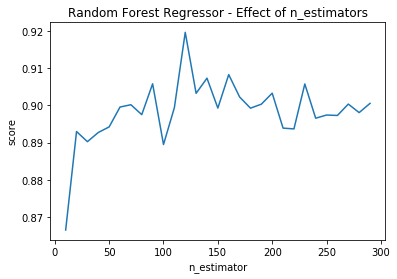

In [198]:
plt.title("Random Forest Regressor - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### 2) I try using AdaBoostClassifier

In [232]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
estimators = np.arange(100, 2000, 200)
scores = []
for n in estimators:
    clf = AdaBoostClassifier(learning_rate = 0.1,n_estimators = n,random_state=42)
    clf_check = clf.fit(X_train,y_train)
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(score)
    print('The Estimator {} has a score of {}'.format(n,score))

The Estimator 100 has a score of [0.92307692 0.88       0.85714286 0.95918367 0.95918367]
The Estimator 300 has a score of [0.94230769 0.9        0.87755102 0.89795918 0.95918367]
The Estimator 500 has a score of [0.92307692 0.9        0.89795918 0.87755102 0.95918367]
The Estimator 700 has a score of [0.86538462 0.9        0.89795918 0.87755102 0.95918367]
The Estimator 900 has a score of [0.90384615 0.92       0.91836735 0.91836735 0.95918367]
The Estimator 1100 has a score of [0.86538462 0.92       0.93877551 0.91836735 0.95918367]
The Estimator 1300 has a score of [0.86538462 0.92       0.93877551 0.91836735 0.95918367]
The Estimator 1500 has a score of [0.84615385 0.92       0.91836735 0.91836735 0.95918367]
The Estimator 1700 has a score of [0.86538462 0.92       0.91836735 0.91836735 0.95918367]
The Estimator 1900 has a score of [0.86538462 0.92       0.91836735 0.91836735 0.93877551]


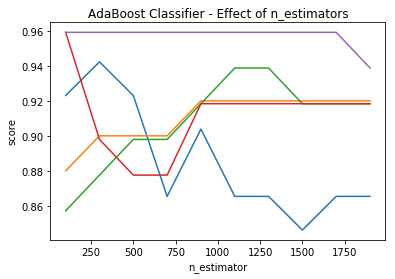

In [242]:
plt.title("AdaBoost Classifier - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### 3) I try using GradientBoostingClassifier

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9722222222222222

#### 4) Lastly I use an ensemble of classifiers. Hoping this gives better results. Since ensembles are better than individual algorithm runs

In [241]:
rfr = RandomForestRegressor()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
rfr_abc_gbc = VotingClassifier(estimators=[('AdaBoostClassifier',abc), ('GradientBoostingClassifier', gbc)], voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The ensembled model with RandomForestRegressor, AdaBoostClassifier and GradientBoostingClassifier:', rfr_abc_gbc.score(X_test,y_test))

The ensembled model with RandomForestRegressor, AdaBoostClassifier and GradientBoostingClassifier: 0.9444444444444444


###### I couldnt use GradientBoostingClassifier in the ensemble testing because it doesnt have predict_prob facility

In [236]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
mlp = MLPClassifier()
gnb = GaussianNB()
lr = LogisticRegression()
gnb_mlp_lr=VotingClassifier(estimators=[('Guassian Naive Bayes', gnb),('Multilayer Perceptron',mlp), ('Logistic Regression', lr)], voting='soft', weights=[3,2,1]).fit(X_train,y_train)
print('The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression:',gnb_mlp_lr.score(X_test,y_test))

The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression: 0.9074074074074074
